<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Decision_Tree_C5_0_CART_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import  classification_report
from sklearn import preprocessing

In [4]:
import seaborn as sns

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [11]:
iris = sns.load_dataset("iris")

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['species'])

In [16]:
x = iris.iloc[:,0:4]
y = iris['Species']

In [17]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [19]:
iris['Species'].unique()

array([0, 1, 2])

In [20]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [23]:
colnames = list(iris.columns)
colnames

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'Species']

In [24]:
iris.drop(["species"], axis=1, inplace=True)

In [26]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

In [27]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

In [28]:
# Splitting data into training and testing data  set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)   # Test_size is the partition amount of test data

#Building Decision Tree Classifier using Entropy Criteria

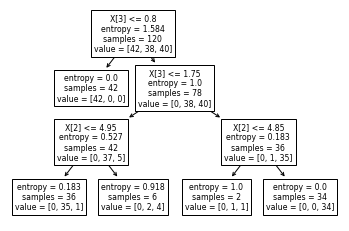

In [32]:
#model = DecisionTreeClassifier(criterion= "entropy", max_depth=3)  #entropy method is used for C5.0
#model.fit(x_train, y_train)     #Max_depth=3, means 3 layers of branches needed

#plot the decision tree
#tree.plot_tree(model);

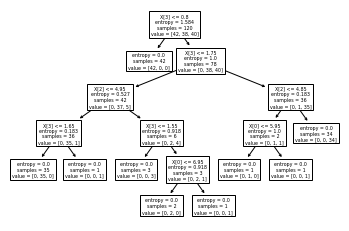

In [40]:
model = DecisionTreeClassifier(criterion= "entropy", max_depth=5)  #entropy method is used for C5.0
model.fit(x_train, y_train)     #Max_depth=5, means 5 layers of branches needed

#plot the decision tree
tree.plot_tree(model);

This Decision tree is not giving us the information, in our understanding. we will plot in a systematic manner 

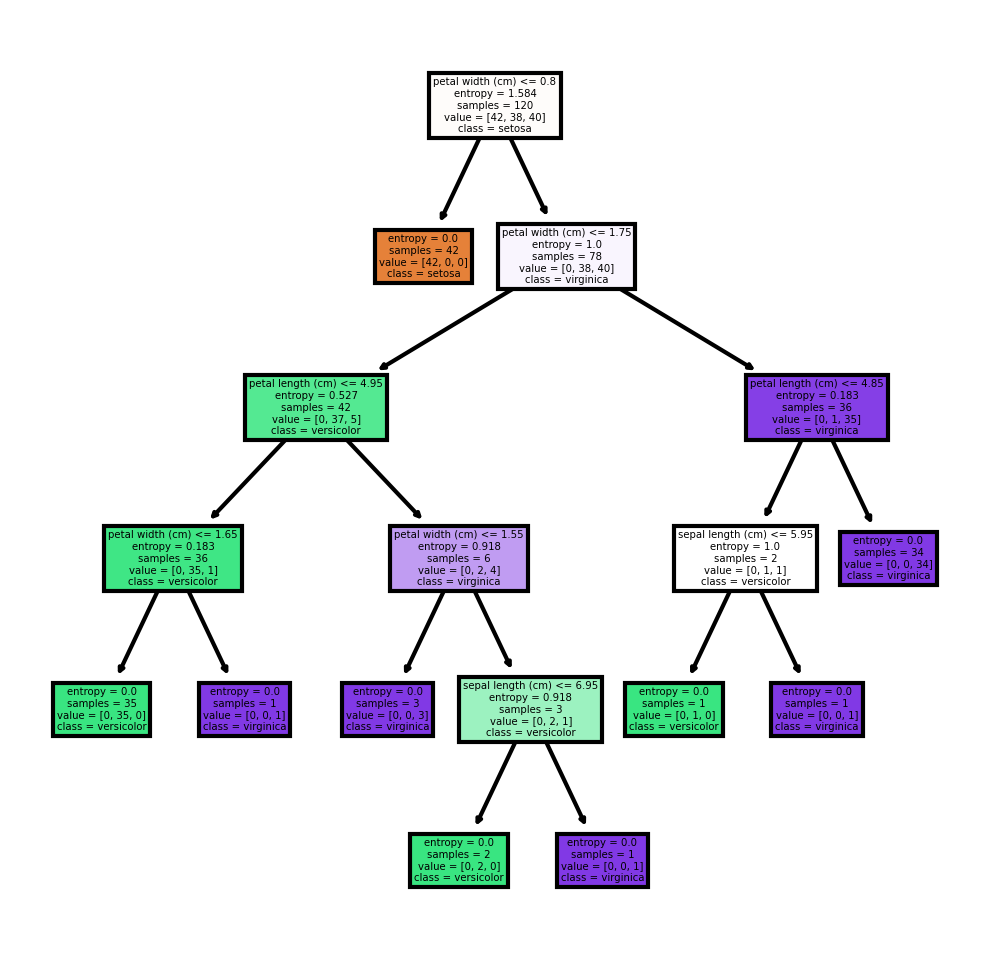

In [41]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [42]:
#Predicting on test data
preds = model.predict(x_test) # Predicting on test data set
pd.Series(preds).value_counts() #getting the count of each category

1    12
2    10
0     8
dtype: int64

13 data belongs to 1st class; 9 data point belongs to 2nd class; 8 data point belongs to 0 class from test data

In [43]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [44]:
y_test

38     0
66     1
115    2
117    2
89     1
136    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
132    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: Species, dtype: int64

38th row belongs to 0 class, out model has predected 0 class; 66th row belongs to 1st class, out model  has predected 2nd class.....

In [45]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [46]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


####As we discussed in confusion metrix we will sum the diagonal values then the total number of values in the data set.
#### as there are no values in the half diagonal places, we can say that the Test Accuracy is 100%

In [47]:
# Accuracy
np.mean(preds==y_test)

1.0